# Ford Gobike Data Exploration and Visualization
#### (slides)

This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Data Exploration:

### The structure of the dataset 
<br>
- The data after wrangling contains 174952 individual trip records with 20 variables collected. The variables can be divided into 4 major categories:<br>

#### 1- trip duration info: <br>
(duration_sec, duration_mins) <br>
<br>
#### 2- station info: <br>
(start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude) <br>
<br>
#### 3- time info: <br>
(start_time, start_hour, start_day, end_time) <br>
<br>
#### 4- user info: <br>
(bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, member_age)
<br>
<br>
##### Variables are drived to 11 numerical variables, and others are 4 datetime, 4 object 'string' type and 1 is boolean type.

### What is/are the main feature(s) of interest in the dataset?
<br>
- in my opinion the main feature to the company will be the trip duration and how it changes by the influence of other features.
<br>
<br>
- also, how trip duration may influnece other features.
<br>
<br>
- some important other features are (start and end station, start hour, start day, gender and age)

### What features in the dataset will help support the investigation into feature(s) of interest?
<br>
- the start station and end station will affect duration owing to the distance between them.
<br>
- user type, member gender and member age will also affect the duration of the trip.
<br>
- Also 'bike_share_for_all_trip' may affect the duration of the trip.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\Users\Tony Tech\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.dropna(inplace= True)

In [4]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [5]:
df['start_hour'] = df.start_time.dt.strftime('%H')
df['start_day'] = df.start_time.dt.strftime('%A')

In [6]:
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [7]:
df['member_age'] = 2021 - df['member_birth_year']
df['duration_mins'] = df['duration_sec']/60

## Univariate Exploration:

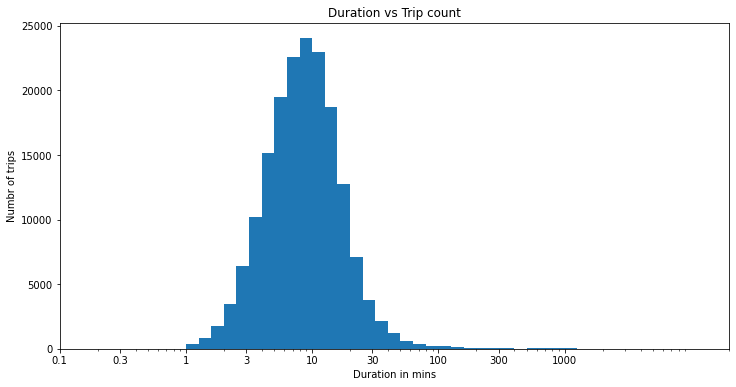

In [8]:
plt.figure(figsize=[12, 6])
# Get the ticks for bins between [0 - maximum duration]
bins = 10 ** np.arange(0, 4.09+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data= df, x='duration_mins', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels)
plt.xlabel('Duration in mins')
plt.ylabel('Numbr of trips')
plt.title('Duration vs Trip count');

###### looks like there's not many trips exceed one hour duration and most trips are between 3 to 30 minutes.

### Now, let's look to the variables that describe the users

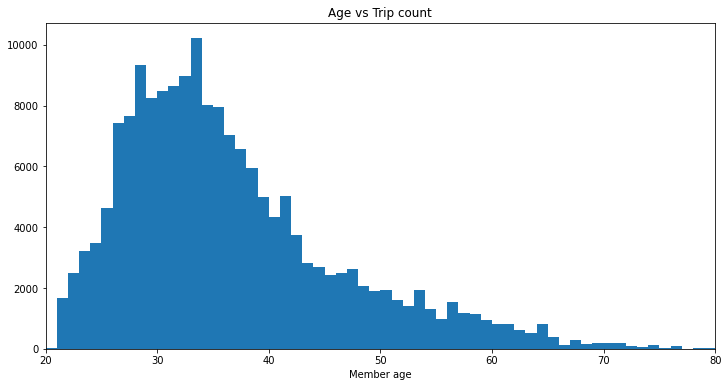

In [9]:
# show age distribution
plt.figure(figsize=[12, 6])
bins = np.arange(df['member_age'].min(), df['member_age'].max(), 1)
plt.hist(data= df, x='member_age', bins=bins)
plt.xlim(20, 80)
plt.xlabel('Member age')
plt.title('Age vs Trip count');

###### looks like that our main course of  users are young people between 20's and 40's, but to make the data more obvious we are going to do some more wrangling by dividing "member_age" column to three categories (young, middle aged, old).

In [10]:
# make new column that divide member age to three categories ['young', 'middle aged', 'old']
bin_edges = [20, 40, 60, 80]
bin_labels = ['young', 'middle aged', 'old']

df['member_age_group'] = pd.cut(df['member_age'], bin_edges, labels = bin_labels)

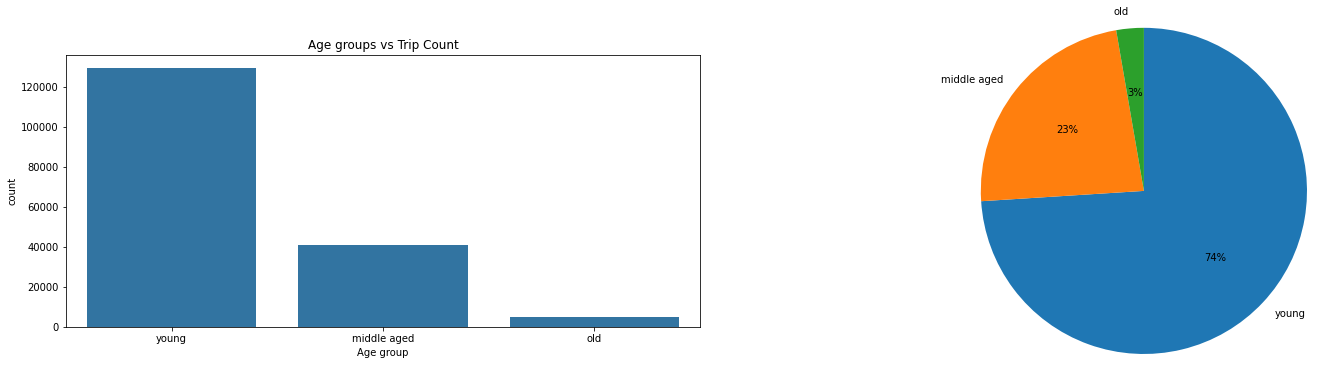

In [11]:
# show age group distibution
base_color = sb.color_palette()[0]
plt.figure(figsize=[25, 5])

plt.subplot(1, 2, 1)
sb.countplot(data= df, x = df['member_age_group'], color = base_color)
plt.xlabel('Age group')
plt.title('Age groups vs Trip Count');

plt.subplot(1, 2, 2)
plt.pie(df['member_age_group'].value_counts(), labels = ['young', 'middle aged', 'old'],
        startangle = 90, counterclock = False, radius = 1.5, autopct = '%0.0f%%');

###### looks like that about 75% of our users are young people between 20's and 40's

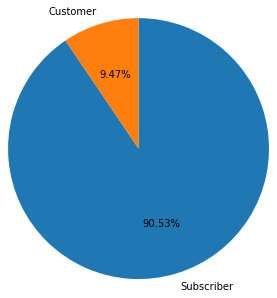

In [12]:
# show user type distribution
plt.pie(df['user_type'].value_counts(), labels = ['Subscriber', 'Customer'],
        startangle = 90, counterclock = False, radius = 1.5, autopct = '%0.2f%%');

###### looks like that about 90% of our users are subscribers

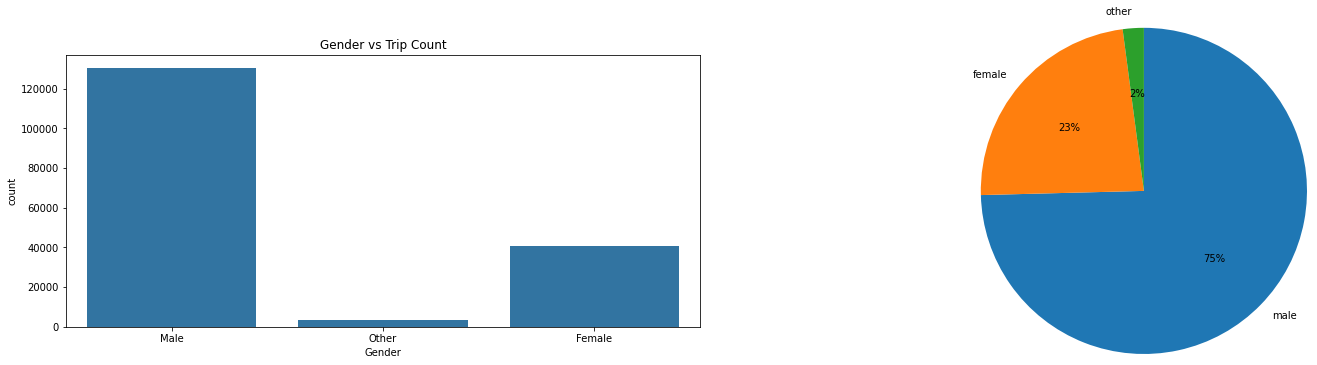

In [13]:
# let's look to the gender
base_color = sb.color_palette()[0]
plt.figure(figsize=[25, 5])

plt.subplot(1, 2, 1)
sb.countplot(data= df, x = df['member_gender'], color = base_color)
plt.xlabel('Gender')
plt.title('Gender vs Trip Count');

plt.subplot(1, 2, 2)
plt.pie(df['member_gender'].value_counts(), labels = ['male', 'female', 'other'],
        startangle = 90, counterclock = False, radius = 1.5, autopct = '%0.0f%%');

###### looks like that about 75% of our users are males

### Now, let's look to the variables that describe the time of the trip

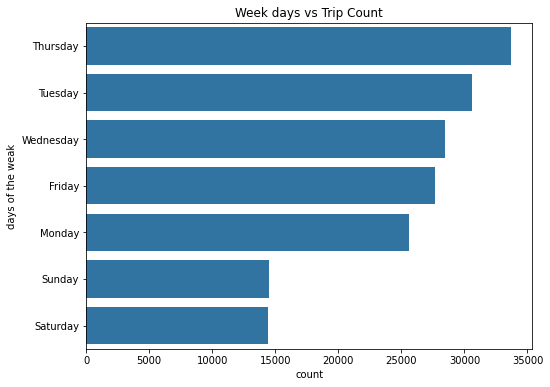

In [14]:
# let's see the distribution of trips in week days
plt.figure(figsize=[8, 6])
sb.countplot(data= df, y = df['start_day'], color = base_color, order = df['start_day'].value_counts().index)
plt.ylabel('days of the weak')
plt.title('Week days vs Trip Count');

###### it looks like the trip count is decreased by 50% during Sunday and Saturday

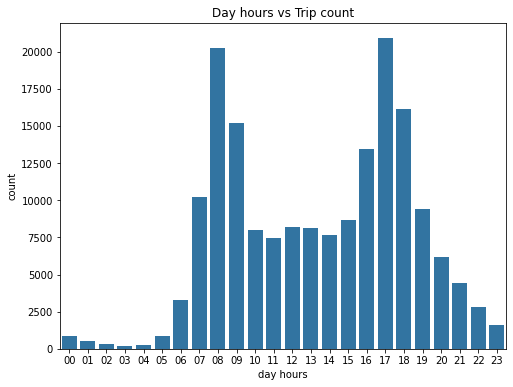

In [15]:
# plotting hours against trip count
plt.figure(figsize=[8, 6])
sb.countplot(data= df, x = df['start_hour'], color = base_color)
plt.xlabel('day hours')
plt.title('Day hours vs Trip count');

###### it looks like that most of trips are occur between 7 a.m and 8 p.m, and it reachs to the peak at 8 a.m and 5 p.m

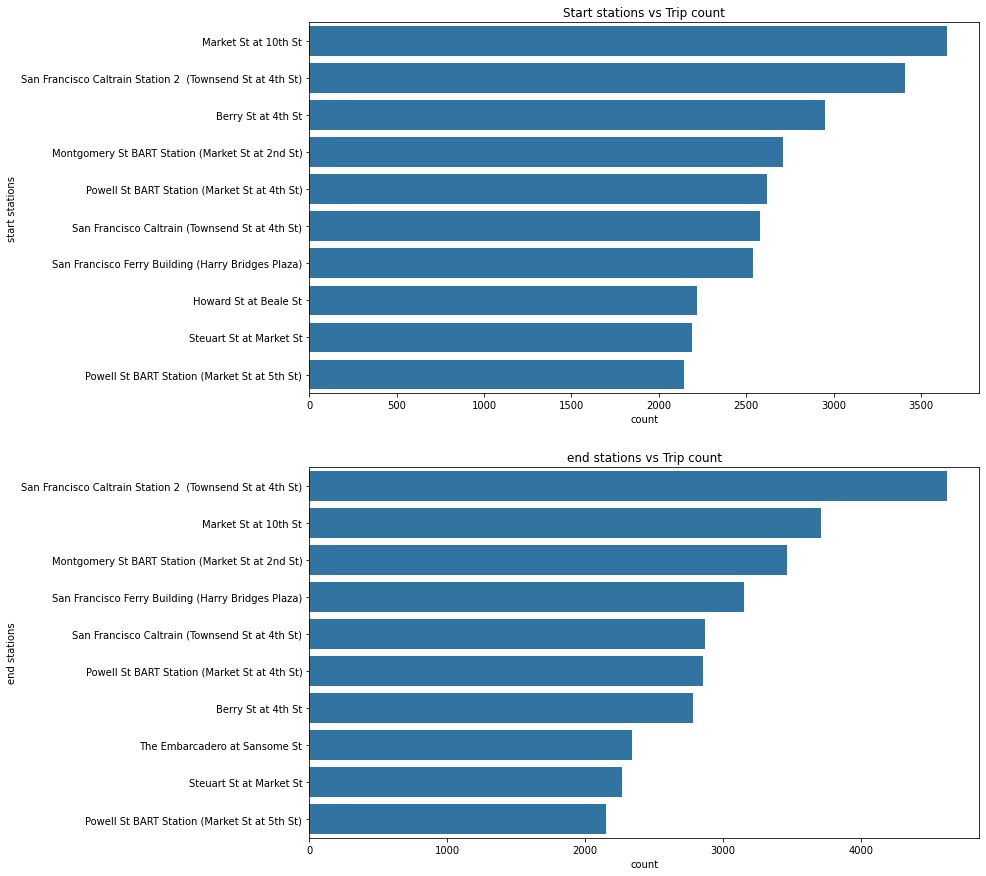

In [16]:
plt.figure(figsize=[12, 15])

# plotting the 10 most popular start stations
plt.subplot(2, 1, 1) 
sb.countplot(data= df, y = df['start_station_name'], color = base_color, order = df['start_station_name'].value_counts()
             .index[:10])
plt.ylabel('start stations')
plt.title('Start stations vs Trip count');

# plotting the 10 most popular end stations
plt.subplot(2, 1, 2) 
sb.countplot(data= df, y = df['end_station_name'], color = base_color, order = df['end_station_name'].value_counts()
             .index[:10])
plt.ylabel('end stations')
plt.title('end stations vs Trip count');

###### it looks like the popular start stations are almost the popular end stations too.

## Bivariate Exploration:

###### Now let's take the trip duration and put it against other variabels that may affect it

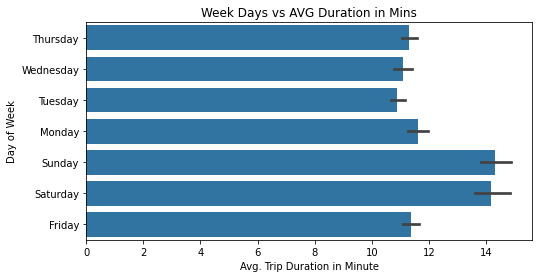

In [17]:
# build barplot between duration time against week days
plt.figure(figsize=[8, 4])
sb.barplot(data= df, y='start_day', x='duration_mins', color=base_color);
plt.ylabel('Day of Week');
plt.xlabel('Avg. Trip Duration in Minute')
plt.title('Week Days vs AVG Duration in Mins');

###### looks like Sunday and Saturday have the highest duration average

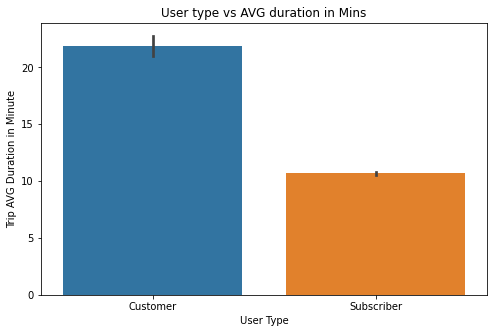

In [18]:
# bar plot between user type and duration 
plt.figure(figsize=[8, 5])

sb.barplot(data= df, x='user_type', y='duration_mins')
plt.xlabel('User Type')
plt.ylabel('Trip AVG Duration in Minute')
plt.title('User type vs AVG duration in Mins');

###### looks like Customers have higher average duration than Subscribers, however Subscribers have the higher number of trips

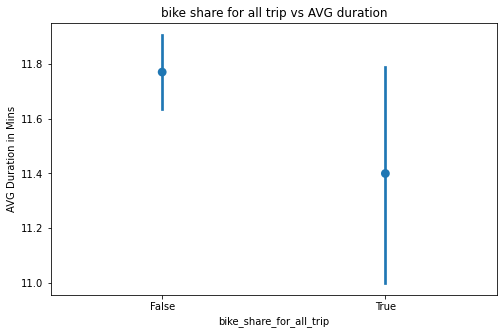

In [19]:
plt.figure(figsize=[8, 5])
sb.pointplot(data = df, x = 'bike_share_for_all_trip', y = 'duration_mins', linestyles= '')
plt.ylabel('AVG Duration in Mins')
plt.title('bike share for all trip vs AVG duration');

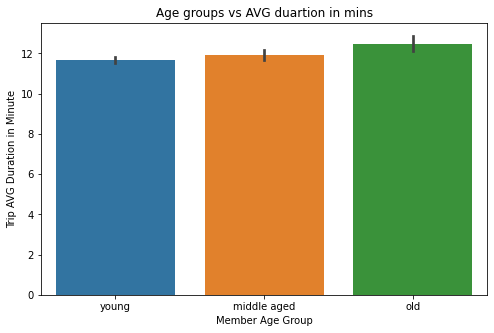

In [20]:
# barplot between age group and duration
plt.figure(figsize=[8, 5])
sb.barplot(data= df, x='member_age_group', y='duration_mins')
plt.xlabel('Member Age Group')
plt.ylabel('Trip AVG Duration in Minute')
plt.title('Age groups vs AVG duartion in mins');

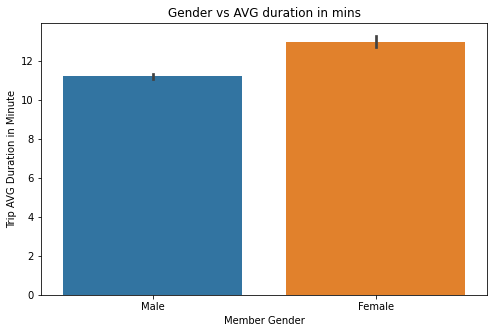

In [21]:
# make the gender between male and females
x_data = df.query("member_gender == 'Male' | member_gender == 'Female'")

# barplot between duration and gender
plt.figure(figsize=[8, 5])
sb.barplot(data= x_data, x='member_gender', y='duration_mins')
plt.xlabel('Member Gender')
plt.ylabel('Trip AVG Duration in Minute')
plt.title('Gender vs AVG duration in mins');

###### Looking to the variables we conclude that :<br>
<br>
1- Sunday and Saturday have the highest duration average with lower number of trips.
<br>
2- Customers have higher average duration than Subscribers.
<br>
3- Bike share for all trip works only with trips that have lower duration.
<br>
4- it looks like that the age group doesn't affect the duration of the trip that much.
<br>
5- females have higher average duration trips, while men have higher trip number.

##### let's devide those variables to subgroups to assure our conclusions:

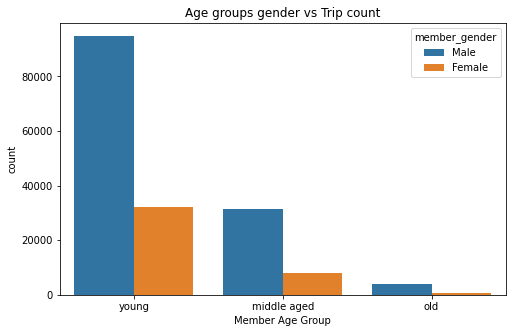

In [22]:
# divide the age group to subgroups of member gender
plt.figure(figsize=[8, 5])
sb.countplot(data = x_data, x = 'member_age_group', hue = 'member_gender')
plt.xlabel('Member Age Group')
plt.title('Age groups gender vs Trip count');

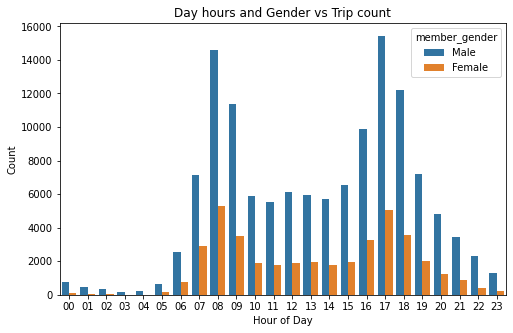

In [23]:
# divide day hours to subgroups of member gender
plt.figure(figsize=[8, 5])
sb.countplot(data= x_data, x='start_hour', hue='member_gender');
plt.xlabel('Hour of Day');
plt.ylabel('Count')
plt.title('Day hours and Gender vs Trip count');

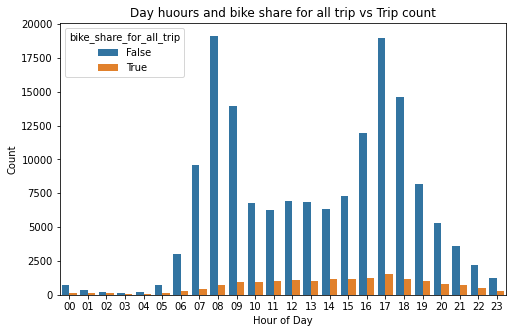

In [24]:
# divide day hours to subgroups of bike share for all trip or not
plt.figure(figsize=[8, 5])
sb.countplot(data= x_data, x='start_hour', hue='bike_share_for_all_trip');
plt.xlabel('Hour of Day');
plt.ylabel('Count')
plt.title('Day huours and bike share for all trip vs Trip count');

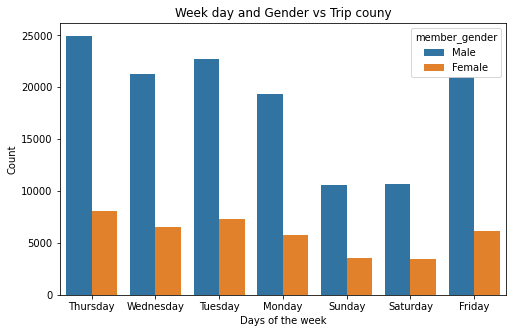

In [25]:
# divide week days to subgroups of member gender
plt.figure(figsize=[8, 5])
sb.countplot(data= x_data, x='start_day', hue='member_gender');
plt.xlabel('Days of the week');
plt.ylabel('Count')
plt.title('Week day and Gender vs Trip couny');

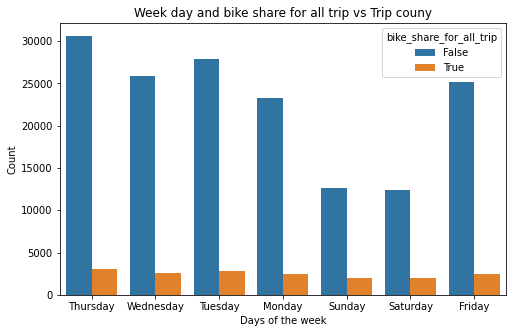

In [26]:
# divide week days to subgroups of bike share for all trip or not
plt.figure(figsize=[8, 5])
sb.countplot(data= df, x='start_day', hue='bike_share_for_all_trip');
plt.xlabel('Days of the week');
plt.ylabel('Count')
plt.title('Week day and bike share for all trip vs Trip couny');

## Multivariate Exploration:

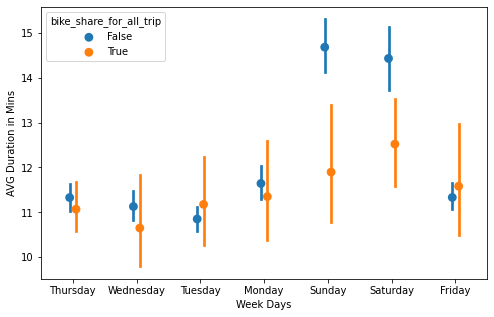

In [27]:
# dividinge week days to subgroups of bike share for all trip or not against average duration
plt.figure(figsize=[8, 5])
sb.pointplot(data = df, x = 'start_day', y = 'duration_mins', hue = 'bike_share_for_all_trip', dodge = 0.1, linestyles= '')
plt.xlabel('Week Days')
plt.ylabel('AVG Duration in Mins');

###### looks like the average duartion of trips is almost the same eiher bike share all trip or not, except on sunday and monday

In [28]:
# exclude Sundays and Saturdays
x1 = df.query("start_day == 'Thursday' | start_day == 'Wednesday' | start_day == 'Tuesday' | start_day == 'Monday' | start_day == 'Friday'")
x1.start_day.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Name: start_day, dtype: int64

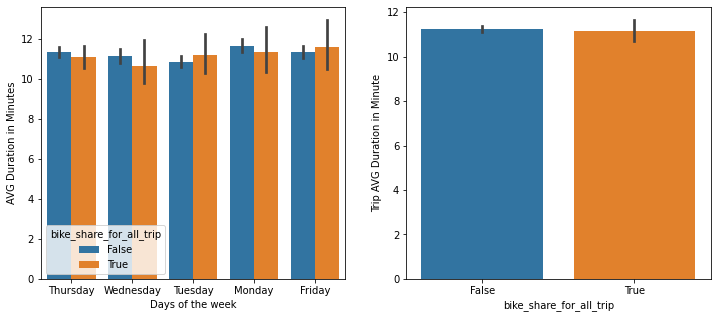

In [29]:
# plotting bike_share_for_all_trip without Sundays and Saturdays
plt.figure(figsize=[12, 5])

plt.subplot(1,2,1)
sb.barplot(data= x1, x='start_day', y = 'duration_mins', hue='bike_share_for_all_trip');
plt.xlabel('Days of the week');
plt.ylabel('AVG Duration in Minutes')

plt.subplot(1,2,2)
sb.barplot(data= x1, x='bike_share_for_all_trip', y='duration_mins')
plt.xlabel('bike_share_for_all_trip')
plt.ylabel('Trip AVG Duration in Minute');

##### now, let's look how gender distributed between variables (week days, age group, user type)

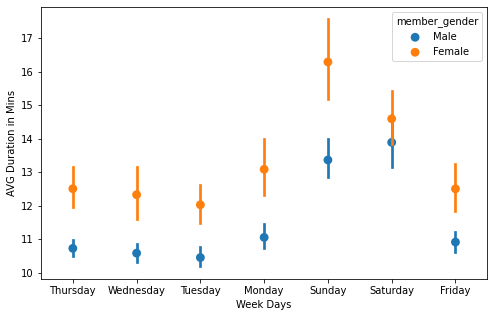

In [30]:
# dividing week days to subgroups according to gender
plt.figure(figsize=[8, 5])
sb.pointplot(data = x_data, x = 'start_day', y = 'duration_mins', hue = 'member_gender', linestyles= '')
plt.xlabel('Week Days')
plt.ylabel('AVG Duration in Mins');

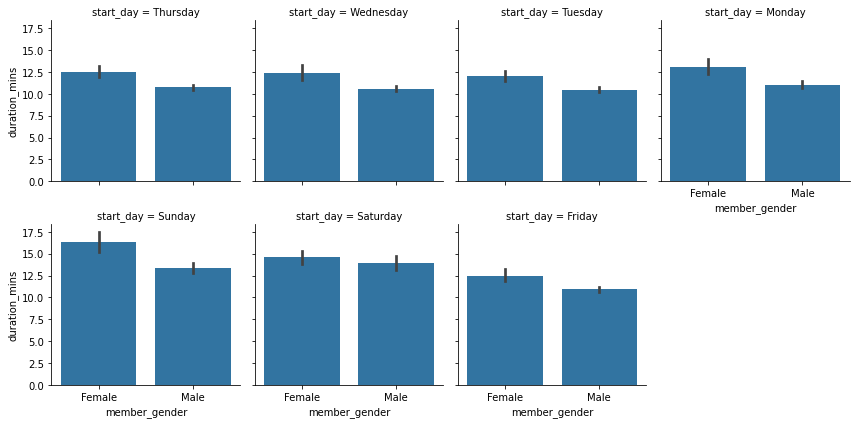

In [31]:
# looking to gender on each day of week individually
g = sb.FacetGrid(data = x_data, col = 'start_day', col_wrap = 4)
g.map(sb.barplot, 'member_gender', 'duration_mins', order = ['Female', 'Male']);

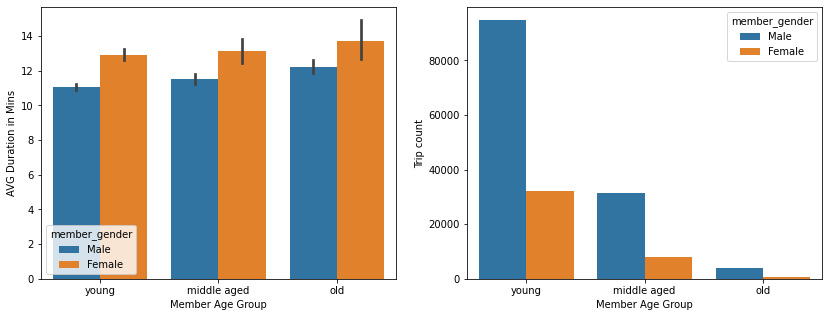

In [32]:
# dividing each age group by gender
plt.figure(figsize=[14, 5])

plt.subplot(1,2,1)
sb.barplot(data = x_data, x = 'member_age_group', y = 'duration_mins', hue = 'member_gender')
plt.xlabel('Member Age Group')
plt.ylabel('AVG Duration in Mins')

plt.subplot(1,2,2)
sb.countplot(data = x_data, x = 'member_age_group', hue = 'member_gender')
plt.xlabel('Member Age Group')
plt.ylabel('Trip count');

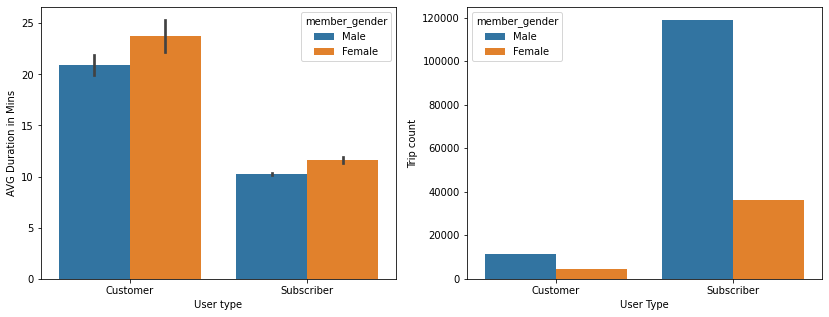

In [33]:
# dividing each user type by gender
plt.figure(figsize=[14, 5])

# gender and user type against average duration
plt.subplot(1,2,1)
sb.barplot(data = x_data, x = 'user_type', y = 'duration_mins', hue = 'member_gender')
plt.xlabel('User type')
plt.ylabel('AVG Duration in Mins')

# gender and user type against trip count
plt.subplot(1,2,2)
sb.countplot(data = x_data, x = 'user_type', hue = 'member_gender')
plt.xlabel('User Type')
plt.ylabel('Trip count');

###### females have higher average duration trips, while men have higher trip couunt.

##### let's look to other member variables across each individual day...

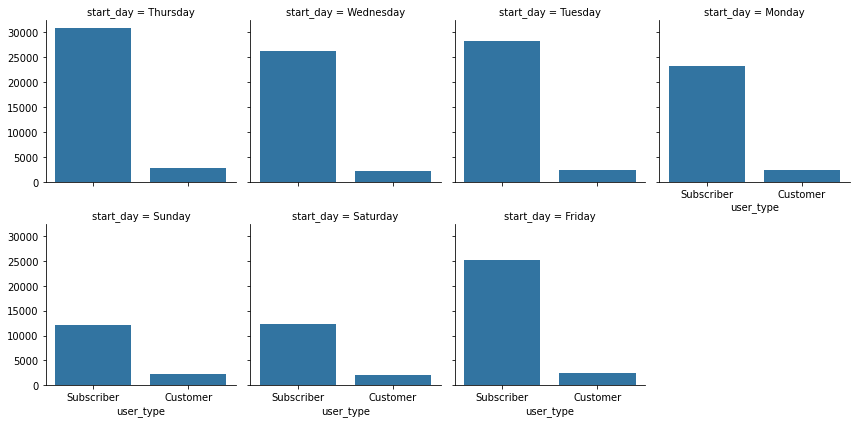

In [34]:
# looking to user type on each day of week individually
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap = 4)
g.map(sb.countplot, 'user_type', order = ['Subscriber', 'Customer']);

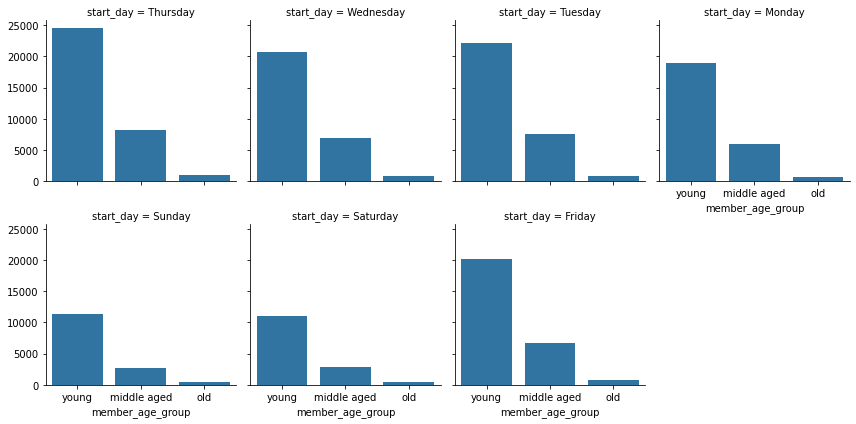

In [35]:
# looking to age group on each day of week individually
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap = 4)
g.map(sb.countplot, 'member_age_group', order = ['young', 'middle aged', 'old']);

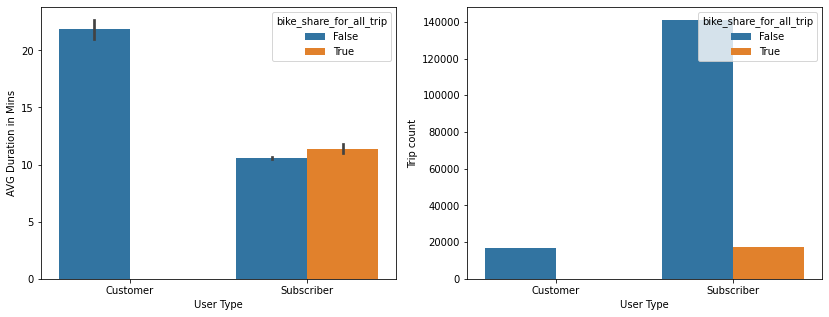

In [36]:
plt.figure(figsize=[14, 5])
# ploting user type divided by subgroups of bike share for all trip against avg duration
plt.subplot(1,2,1)
sb.barplot(data = df, x = 'user_type', y = 'duration_mins', hue = 'bike_share_for_all_trip')
plt.xlabel('User Type')
plt.ylabel('AVG Duration in Mins')
# ploting user type divided by subgroups of bike share for all trip against trip count
plt.subplot(1,2,2)
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.xlabel('User Type')
plt.ylabel('Trip count');

###### looks like Customers never use bike share for all trip, while Subscribers do.

## Conclusions:<br>

1. not many trips exceed one hour duration and most trips are between 3 to 30 minutes.
<br>
2. about 75% of our users are young people between 20's and 40's
<br>
3. more than 90% of our users are subscribers
<br>
4. about 75% of our users are males
<br>
5. the trip count is decreased by 50% during Sunday and Saturday
<br>
6. that most of trips are occur between 7 a.m and 8 p.m, and it reachs to the peak at 8 a.m and 5 p.m
<br>
7. the popular start stations are almost the popular end stations too.
<br>
8. Sunday and Saturday have the highest duration average
<br>
9. Customers have higher average duration than Subscribers, however Subscribers have the higher number of trips
<br>
10. Bike share for all trip works only with trips that have lower duration.
<br>
11. age group doesn't affect the duration of the trip that much.
<br>
12. females have higher average duration trips, while men have higher trip number.
<br>
13. the average duartion of trips is almost the same eiher bike share all trip or not, except on sunday and monday
<br>
14. Customers never use bike share for all trip, while Subscribers do.

In [38]:
!jupyter nbconvert visual.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook visual.ipynb to slides
[NbConvertApp] Writing 896553 bytes to visual.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Tony Tech\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Tony Tech\Anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Tony Tech\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Tony Tech\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Tony Tech\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\U